In [2]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
import pathlib
os.chdir('c:\\Users\\rache\\Downloads\\dsbook\\Data')
data_dir = os.path.join('coil_100')
data_dir= pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.png'))) #data_dir.glob will scrap whatever it is in the data_dir.
class_name = os.listdir(data_dir)

In [4]:
from tensorflow.keras import preprocessing
BATCH_SIZE =100
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
def show_batch(image_batch ):
  plt.figure(figsize=(8,8))
  for i in range(9):
      ax = plt.subplot(3,3,i+1)
      plt.imshow(image_batch[i])
      plt.axis('off')

In [5]:
image_data_generator = preprocessing.image.ImageDataGenerator(rescale=1./255)
train_data_gen = image_data_generator.flow_from_directory(directory=data_dir, target_size = (28,28), batch_size=100, shuffle=True, classes = list(class_name))

Found 216 images belonging to 3 classes.


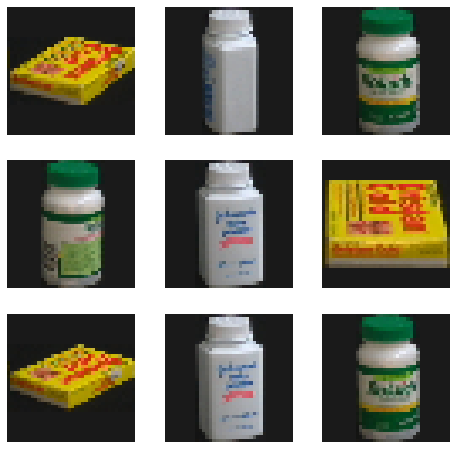

In [6]:
image_batch, label_batch = next(iter(train_data_gen))
show_batch(image_batch )
#plt.savefig('coil100_2828.png', dpi=72, bbox_inches='tight')

Found 216 images belonging to 3 classes.


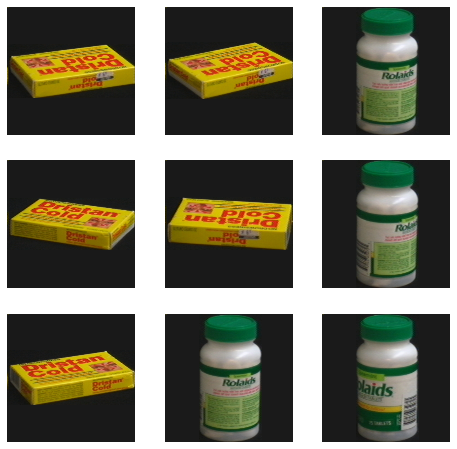

In [7]:
train_data_gen = image_data_generator.flow_from_directory(directory=data_dir, target_size = (128,128),
                                                              batch_size=100, shuffle=True,
                                                              classes = list(class_name))
image_batch, label_batch = next(iter(train_data_gen))
show_batch(image_batch )


In [8]:
def train_images ():
    
    image_data_generator = preprocessing.image.ImageDataGenerator(rescale=1./255,dtype='float32')
    train_data_gen = image_data_generator.flow_from_directory(directory=data_dir, target_size = (28,28),shuffle=True,
                                                              classes = list(class_name))
    return train_data_gen[0][0].astype('float32'), train_data_gen[0][1].astype('float32')

 

In [9]:
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Conv2DTranspose, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, Model
img_width, img_height = 28,28
input_depth =3
input_shape_val = (img_width, img_height,input_depth)

input_img = Input(shape=input_shape_val, name = 'input')
encoder = Conv2D(32, (3, 3), activation='relu', padding='same' )(input_img)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)
encoder = Conv2D(16, (3, 3), activation='relu', padding='same' )(input_img)
encoder = MaxPooling2D((2, 2), padding='same')(encoder)
encoder = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder)
encoder = MaxPooling2D((2, 2), padding='same')(encoder )
encoder  = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder)

encoded = MaxPooling2D((2, 2), padding='same')(encoder )
#DECODER
decoder = Conv2D(8,(3, 3),  activation='relu', padding='same')(encoded)
decoder = UpSampling2D((2,2))(decoder)
decoder = Conv2D(8,(3, 3),  activation='relu', padding='same')(decoder)
decoder = UpSampling2D((2,2))(decoder)
decoder = Conv2D(16,(3, 3), activation='relu')(decoder)
decoder = UpSampling2D((2,2))(decoder)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder)
auto_encoder = Model(input_img, decoded)
auto_encoder.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_

In [10]:
## For black and white photo 
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Conv2DTranspose, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, Model
#ENCODER
img_width, img_height = 28,28
input_depth =1
input_shape_val = (img_width, img_height,input_depth)

input_img = Input(shape=input_shape_val, name = 'input')
encoder = Conv2D(32, (3, 3), activation='relu')(input_img)
encoder = MaxPooling2D((2, 2))(encoder)
encoder = Conv2D(64, (3, 3), activation='relu')(encoder)
encoder = MaxPooling2D((2, 2))(encoder )
encoder  = Conv2D(64, (3, 3), activation='relu')(encoder)
l = Flatten()(encoder )
l = Dense(49, activation='softmax')(l)
#DECODER
decoder = Reshape((7,7,1))(l)
decoder = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(decoder)
decoder = BatchNormalization()(decoder)
decoder = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(decoder)
decoder = BatchNormalization()(decoder)
decoder = Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(decoder)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoder)
auto_encoder_2 = Model(input_img, decoded)
auto_encoder_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
__________

In [11]:
auto_encoder.compile(optimizer="adadelta", loss="mse")
auto_encoder.fit(next(iter( train_images())),next(iter( train_images())),steps_per_epoch=100, batch_size= 20, epochs =500)

==============] - 6s 64ms/step - loss: 0.0044
Epoch 267/500
100/100 [==============================] - 6s 64ms/step - loss: 0.0044
Epoch 268/500
100/100 [==============================] - 6s 63ms/step - loss: 0.0044
Epoch 269/500
100/100 [==============================] - 6s 63ms/step - loss: 0.0044
Epoch 270/500
100/100 [==============================] - 6s 63ms/step - loss: 0.0044
Epoch 271/500
100/100 [==============================] - 6s 64ms/step - loss: 0.0044
Epoch 272/500
100/100 [==============================] - 6s 63ms/step - loss: 0.0043
Epoch 273/500
100/100 [==============================] - 6s 63ms/step - loss: 0.0044
Epoch 274/500
100/100 [==============================] - 6s 64ms/step - loss: 0.0043
Epoch 275/500
100/100 [==============================] - 6s 64ms/step - loss: 0.0043
Epoch 276/500
100/100 [==============================] - 6s 63ms/step - loss: 0.0043
Epoch 277/500
100/100 [==============================] - 7s 66ms/step - loss: 0.0044
Epoch 278/500
100/1

Found 216 images belonging to 3 classes.
32/32 [==============================] - 0s 625us/sample


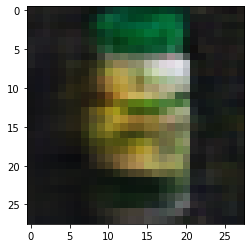

In [34]:
prediction = auto_encoder.predict(train_images(), verbose=1, batch_size=150)
# you can now display an image to see it is reconstructed well
x =prediction[11]
plt.imshow(x)
#plt.savefig('AE_output1.png', dpi=72, bbox_inches='tight')

In [23]:
## Save model

In [27]:
autoencoder_save = auto_encoder.to_json()
with open ('autoencoder.json', 'w') as json_file:
    json_file.write(autoencoder_save)

In [15]:
## Load pretrained model

In [16]:
json_file = open('autoencoder.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

from tensorflow.keras.models import model_from_json
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_tex.h5")
print("Loaded model from disk")
y_pred = loaded_model.predict(train_images(), verbose=1, batch_size=10)

OSError: Unable to open file (unable to open file: name = 'model_tex.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

## Plot the prediction

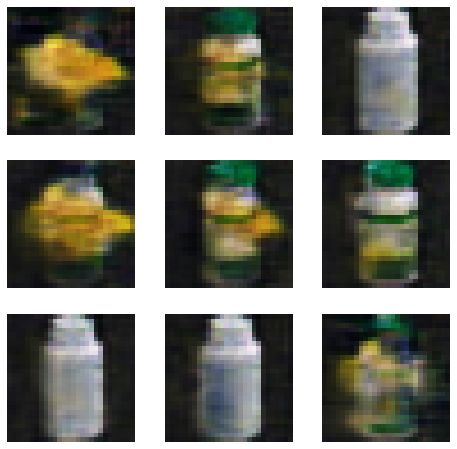

In [26]:
 
img_ind = 1
plt.figure(figsize=(8,8))
while img_ind <10:
    ax = plt.subplot(3,3,img_ind)
    img_ind = img_ind+1
    x =prediction[img_ind]
    plt.imshow(x)
    plt.axis('off')
    #plt.savefig('AE_output.png', dpi=72, bbox_inches='tight')

In [18]:


# Plot original, encoded and predicted image
import numpy as np
images_show_start = 1
images_show_stop = 20
images_show_number = images_show_stop - images_show_start +1

images,_ = train_generator.next()
plt.figure(figsize=(30, 5))
for i in range(images_show_start, images_show_stop):
    # original image
    ax = plt.subplot(3, images_show_number, i +1)
    image = images[i,:,:,0]
    image_reshaped = np.reshape(image, [1, 28, 28, 1])
    plt.imshow(image,cmap='gray')

    # label
    image_label = os.path.dirname(validation_generator.filenames[i])
    plt.title(image_label) # only OK if shuffle=false

    # encoded image
    ax = plt.subplot(3, images_show_number, i + 1+1*images_show_number)
    image_encoded = auto_encoder.predict(image_reshaped)
     # adjust shape if the network parameters are adjusted
    image_encoded_reshaped = np.reshape(image_encoded, [16,32])
    plt.imshow(image_encoded_reshaped,cmap='gray')

    # predicted image
    ax = plt.subplot(3, images_show_number, i + 1+ 2*images_show_number)
    image_pred = autoencoder.predict(image_reshaped)
    image_pred_reshaped = np.reshape(image_pred, [128,128])
    plt.imshow(image_pred_reshaped,cmap='gray')
plt.show()

NameError: name 'train_generator' is not defined